In [212]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
img = cv2.imread("1.jpg")

In [13]:
img = cv2.imread("1.jpg")
img_scaled = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)

In [14]:
img.shape

(355, 500, 3)

In [15]:
img_scaled.shape

(178, 250, 3)

In [16]:
cv2.imwrite("resize.jpg", img_scaled)

True

In [21]:
img = cv2.imread("1.jpg")
img_scaled = cv2.resize(img, None, fx=2.0, fy=2.0, interpolation = cv2.INTER_AREA)

In [22]:
cv2.imwrite("resize.jpg", img_scaled)

True

In [23]:
img = cv2.imread("1.jpg")
img_scaled = cv2.resize(img, None, fx=5.0, fy=5.0, interpolation = cv2.INTER_AREA)

In [24]:
cv2.imwrite("res.jpg", img_scaled)

True

In [25]:
img_scaled.shape

(1775, 2500, 3)

#### Affine Transformation

In [82]:
num_rows, num_cols = img.shape[:2]

In [83]:
print(num_rows,num_cols)

340 510


In [84]:
src = np.float32([[0,0],[num_cols-1,0],[0,num_rows-1],[num_cols-1,num_rows-1]])

In [85]:
src

array([[  0.,   0.],
       [509.,   0.],
       [  0., 339.],
       [509., 339.]], dtype=float32)

In [86]:
dst_point = np.float32([  [0,0],[num_cols-1,0], [int(0.3*num_cols), num_rows-1], [int(0.6*num_cols), num_rows-1]  ])

In [87]:
dst_point

array([[  0.,   0.],
       [509.,   0.],
       [153., 339.],
       [306., 339.]], dtype=float32)

In [88]:
project_matrix = cv2.getPerspectiveTransform(src, dst_point)

In [89]:
project_matrix

array([[ 1.        ,  1.50147493,  0.        ],
       [ 0.        ,  3.32679739,  0.        ],
       [-0.        ,  0.00686371,  1.        ]])

In [208]:
img_out = cv2.warpPerspective(img, project_matrix, (num_cols,num_rows))

In [209]:
cv2.imwrite("mine.jpg",img_out)

True

In [198]:
img = cv2.imread("1.jpg")

In [199]:
num_rows, num_cols = img.shape[:2]

In [200]:
src = np.float32([[0,0],[num_cols-1,0],[0,num_rows-1],[num_cols-1,num_rows-1]])

In [201]:
src

array([[  0.,   0.],
       [509.,   0.],
       [  0., 339.],
       [509., 339.]], dtype=float32)

In [202]:
dest_point = np.float32( [ [0,0], [num_cols-1,int(0.4*num_rows)], [0,num_rows-1], [num_cols-1, int(0.6*num_rows)] ] )

In [203]:
dest_point

array([[  0.,   0.],
       [509., 136.],
       [  0., 339.],
       [509., 204.]], dtype=float32)

In [204]:
pro_mat = cv2.getPerspectiveTransform(src, dest_point)

In [205]:
pro_mat

array([[ 4.98529412e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.33202358e+00,  1.00000000e+00,  0.00000000e+00],
       [ 7.82965446e-03, -1.65004175e-18,  1.00000000e+00]])

In [206]:
img_out = cv2.warpPerspective(img, pro_mat, (num_cols,num_rows))

In [258]:
cv2.imwrite("my.jpg",img_out)

True

In [210]:
img_out.shape

(340, 510, 3)

In [211]:
img.shape

(340, 510, 3)

#### Image Wrapping

In [248]:
img = cv2.imread("1.jpg")

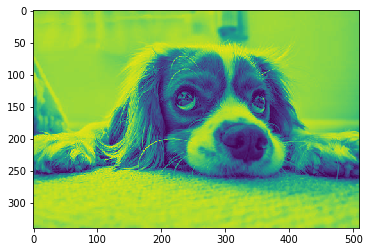

In [249]:
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_img)

In [250]:
rows, cols = grey_img.shape

In [251]:
print(rows, cols)

340 510


In [252]:
img_output = np.zeros(grey_img.shape)

In [253]:
print(img_output)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [254]:
img_output.shape

(340, 510)

In [265]:
for i in range(rows):
    for j in range(cols):
        
        offset_x = int(80.0 * math.cos(2*3.14*i / 180))
        offset_y = 0

        if offset_x + j  < cols:
            img_output[i,j] = grey_img[i,(j+offset_x)]
        else:
            img_output[i,j] = 0

In [266]:
img_output

array([[203., 203., 203., ...,   0.,   0.,   0.],
       [205., 205., 205., ...,   0.,   0.,   0.],
       [206., 207., 206., ...,   0.,   0.,   0.],
       ...,
       [218., 218., 218., ...,   0.,   0.,   0.],
       [218., 218., 218., ...,   0.,   0.,   0.],
       [219., 219., 219., ...,   0.,   0.,   0.]])

In [267]:
cv2.imwrite("final.jpg", img_output)

True

In [ ]:
img = cv2.imread("1.jpg")
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_img)
rows, cols = grey_img.shape
print(rows, cols)
img_output = np.zeros(grey_img.shape)
for i in range(rows):
    for j in range(cols):
        offset_x = int(80.0 * math.cos(2*3.14*i / 180))
        offset_y = 0

        if offset_x + j  < cols:
            img_output[i,j] = grey_img[i,(j+offset_x)]
        else:
            img_output[i,j] = 0
cv2.imwrite("final.jpg", img_output)